In [3]:
import os  
import json  
from openai import AzureOpenAI
from dotenv import load_dotenv  
from tenacity import retry, wait_random_exponential, stop_after_attempt  
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cosine
from scipy.spatial import distance
from tabulate import tabulate

<function matplotlib.pyplot.show(close=None, block=None)>

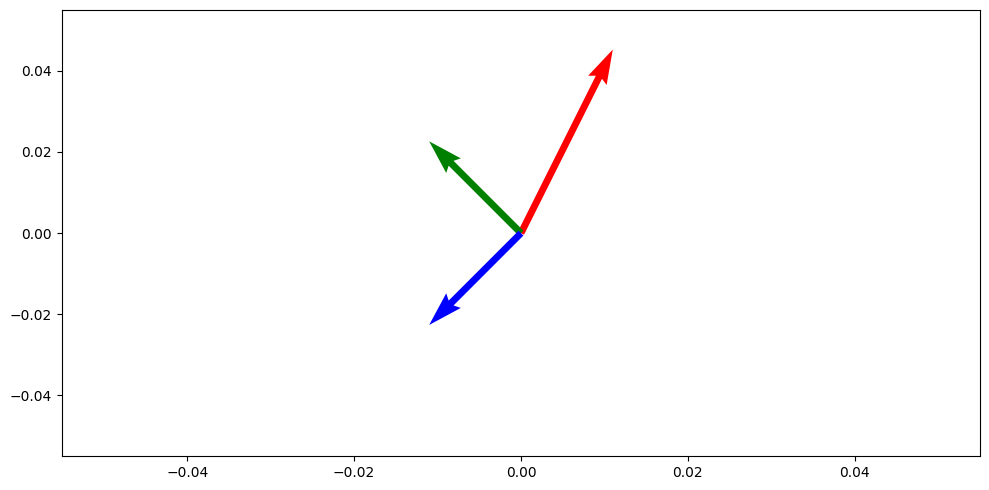

In [2]:

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.autolayout'] = True
data = np.array([[1,2],[-1,1],[-1,-1]])
origin = np.array([[0,0,0],[0,0,0]])
plt.quiver(*origin, data[:,0], data[:,1], color=['r','g','b'], scale=10)
plt.show

In [5]:
load_dotenv()
def generate_embeddings(text):
    client = AzureOpenAI(
    api_key = os.getenv("AZURE_OPENAI_API_KEY"),  
    api_version = "2023-05-15",
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
    )
    model: str = "text-embedding-ada-002" 
    return client.embeddings.create(input = [text], model=model).data[0].embedding

In [6]:
v1 = generate_embeddings("dogs are cute. Therefore adapting a dog improves your mood. Infact, many people have dogs as pets.")
v2 = generate_embeddings("Domestic animals as pets are great. cats seem to be wonderful. Some people like cats. Beware of the allergens though!!!")
v3 = generate_embeddings("sports are good for your health. Children play flag football. they iconize Tom brady as he is the best quarterback ever!!!")
v4 = generate_embeddings("les chiens sont mignons. Par conséquent, adapter un chien améliore votre humeur. Cependant, certains enfants peuvent être allergiques aux chiens.")

In [7]:
print(tabulate([['V1-->V2',np.dot(v1, v2)] ,['V1-->V3',np.dot(v1, v3)], ['V1-->V4',np.dot(v1, v4)],['V2-->V4',np.dot(v2, v4)],['V1-->V1',np.dot(v1, v1)]], headers=['Vec-->Vec','Dot Prod'], tablefmt='orgtbl'))
print('\n')
print(tabulate([['V1-->V2',cosine(v1, v2)] ,['V1-->V3',cosine(v1, v3)], ['V1-->V4',cosine(v1, v4)],['V2-->V4',cosine(v2, v4)],['V1-->V1',cosine(v1, v1)]], headers=['Vec-->Vec','Cos Sim.'], tablefmt='orgtbl'))
print('\n')
print(tabulate([['V1-->V2',distance.euclidean(v1, v2)] ,['V1-->V3',distance.euclidean(v1, v3)], ['V1-->V4',distance.euclidean(v1, v4)],['V2-->V4',distance.euclidean(v2, v4)],['V1-->V1',distance.euclidean(v1, v1)]], headers=['Vec-->Vec','Eu Dist.'], tablefmt='orgtbl'))

| Vec-->Vec   |   Dot Prod |
|-------------+------------|
| V1-->V2     |   0.830466 |
| V1-->V3     |   0.739152 |
| V1-->V4     |   0.875835 |
| V2-->V4     |   0.79109  |
| V1-->V1     |   1        |


| Vec-->Vec   |   Cos Sim. |
|-------------+------------|
| V1-->V2     |   0.169534 |
| V1-->V3     |   0.260848 |
| V1-->V4     |   0.124165 |
| V2-->V4     |   0.20891  |
| V1-->V1     |   0        |


| Vec-->Vec   |   Eu Dist. |
|-------------+------------|
| V1-->V2     |   0.582296 |
| V1-->V3     |   0.722285 |
| V1-->V4     |   0.498326 |
| V2-->V4     |   0.64639  |
| V1-->V1     |   0        |


In [ ]:
from utils.hydrateaisearchindex import hydrateaisearchindex
hydrateaisearchindex.hydrateindex

In [1]:
from operator import index
from dotenv import load_dotenv
from utils.performvectorsearch import performvectorsearch
indexname= "demo-index"

pvs = performvectorsearch()
query="How can I host my website?"

results = pvs.searchvector(query,"contentVector,titleVector",["title", "content", "category"])
for result in results:  
    print(f"Semantic Captions: {result['@search.captions'][0].highlights}")
    print(f"Semantic Text: {result['@search.captions'][0].text}")
    print(f"Title: {result['title']}")  
    print(f"Score: {result['@search.score']}")  
    print(f"ReRanker Score: {result['@search.reranker_score']}")  
    print(f"Content: {result['content']}")  
    print(f"Category: {result['category']}\n")  

Semantic Captions: 
Semantic Text: Azure Power BI Embedded is a cloud-based analytics service that enables you to embed interactive visualizations and reports into your applications. It provides features like data exploration, custom visuals, and real-time data refresh.
Title: Azure Power BI Embedded
Score: 0.04793839901685715
ReRanker Score: 0.446078360080719
Content: Azure Power BI Embedded is a cloud-based analytics service that enables you to embed interactive visualizations and reports into your applications. It provides features like data exploration, custom visuals, and real-time data refresh. Power BI Embedded supports various data sources, such as Azure SQL Database, Azure Blob Storage, and on-premises databases. You can use Power BI Embedded to create data-driven applications, improve decision-making, and enhance user experiences. It also integrates with other Azure services, such as Azure Synapse Analytics and Azure Machine Learning.
Category: Analytics

Semantic Captions: 
